## Gaussian distribution

Also known as Normal distribution, denoted by $N(\mu,\sigma^2)$, is a continuos probability distribution. 

For a random variable $x$, the probability density function of Gaussian distribution is:

$p(x;\mu, \sigma^2) = \frac{1}{\sigma \sqrt{2\pi}} e^-\frac{(x-\mu)^2}{2\sigma^2}$

where $\mu$ is the mean and $\sigma$ is the standard deviation 

##### Python code to generate a gaussian distribution

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [144]:
def pdf_gaussian_distribution(x, mu, sigma):
    return 1/(sigma * np.sqrt(2*np.pi))*(np.exp(-1*(x-mu)**2 / (2*sigma**2)))

Text(0, 0.5, 'Probability density')

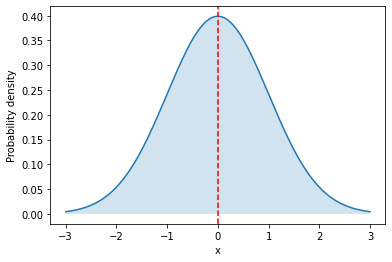

In [145]:
mu = 0.0
sigma = 1.0
num_samples = 1000
x_value = np.linspace(-3, 3, num_samples) #x is between -3 to +3
y_value = pdf_gaussian_distribution(x = x_value, mu = mu, sigma = sigma)

#Plot
plt.plot(x_value, y_value)
plt.axvline(x = 0, color = "r", linestyle = "--")
plt.fill_between(x_value , y_value, 0, alpha=0.2) #alpha for transparency

plt.xlabel("x")
plt.ylabel("Probability density")

Changing $\mu$ shifts the distribution while changing $\sigma$ changes the shape of the distribution

##### Case 1: Varying $\mu$

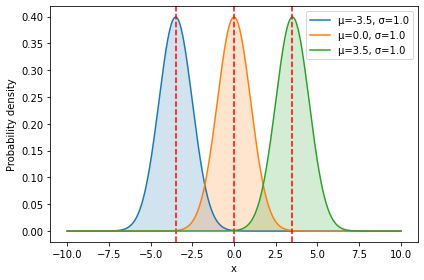

In [174]:
varying_mu = [(-3.5,1.0), (0.0,1.0), (3.5,1.0)]
size_mu = len(varying_mu)

num_samples = 1000
x_value = np.linspace(-10, 10, num_samples) #x is between -10 to +10

for i in range(0,size_mu):
    y_value = pdf_gaussian_distribution(x = x_value, mu = varying_mu[i][0], sigma = varying_mu[i][1])
    
    legend = "μ="+str(varying_mu[i][0])+", σ="+str(varying_mu[i][1])
    #Plot
    plt.plot(x_value, y_value,label = legend)
    plt.axvline(x = varying_mu[i][0], color = "r", linestyle = "--")
    plt.fill_between(x_value , y_value, 0, alpha=0.2) #alpha for transparency
    
    plt.tight_layout() 
    plt.legend(loc='upper right')
    plt.xlabel("x")
    plt.ylabel("Probability density")

##### Case 2: Varying $\sigma$

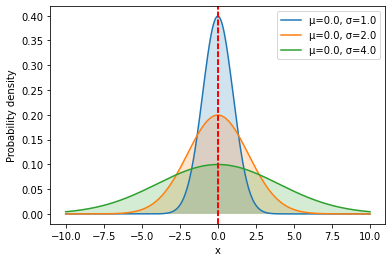

In [175]:
varying_sigma = [(0.0,1.0), (0.0,2.0), (0.0,4.0)]
size_sigma = len(varying_sigma)

num_samples = 1000
x_value = np.linspace(-10, 10, num_samples) #x is between -10 to +10

for i in range(0,size_sigma):
    y_value = pdf_gaussian_distribution(x = x_value, mu = varying_sigma[i][0], sigma = varying_sigma[i][1])
    
    legend = "μ="+str(varying_sigma[i][0])+", σ="+str(varying_sigma[i][1])
    #Plot
    plt.plot(x_value, y_value,label=legend)
    plt.axvline(x = varying_sigma[i][0], color = "r", linestyle = "--")
    plt.fill_between(x_value , y_value, 0, alpha=0.2) #alpha for transparency
    
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("Probability density")

### Multivariate Gaussian Distribution

Here $x$ will be a real valued vector input instead of a single real valued variable. The $\mu$ will be a vector and the $\sigma$ will be a covariance matrix $\Sigma$

$p(x;\mu, \Sigma) = \frac{1}{(2\pi)^\frac{d}{2} |\Sigma|^\frac{1}{2}} e^{(-\frac{1}{2}(x-\mu)^\top \Sigma^{-1} (x-\mu))}$

where $X = {x_1, x_2, ....}$ a d dimensional vector,
$\mu = {\mu_1, \mu_2, ....}$ a d dimensional vector,
$\Sigma$ is a $D \times D$ covariance matrix


Python code to generate a multivariate gaussian distribution

In [3]:
pip install scipy

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: /Users/anuhyasuri/opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
from scipy.stats import multivariate_normal

In [49]:
def generate_multivariate_gaussian(mean, cov):
    gaussian_dist = multivariate_normal(mean,cov)
    x, y = np.mgrid[-3:3:0.01,-3:3:0.01]
    pos = np.dstack((x, y))
    z = gaussian_dist.pdf(pos)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
#     ax.contour(x, y, z)
    plt.xlabel("x")
    plt.ylabel("y")
    ax.set_zlabel('Probability density')
#     plt.zlabel("Probability density")
    ax.plot_surface(x,y,z,cmap='viridis')
    plt.show()

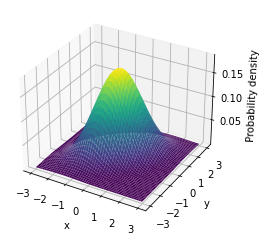

In [50]:
mean = [0.0,0.0]
cov = [[1.0,0.5], [0.5,1.0]]

generate_multivariate_gaussian(mean, cov)

### Covariance matrix

$\begin{bmatrix} 
    cov(x_1x_1) & \dots  & cov(x_1x_n)\\
    \vdots & \ddots & \vdots\\
    cov(x_nx_1) & \dots  & cov(x_nx_n) 
    \end{bmatrix}$

Each entry is covariance of two random variables

Covariance only describes the linear relationship between two variables. If two random variables $x_1$ and $x_2$ are independent, then $Cov(x_1,x_2)$ is 0. **Covariance does not take into account non linear relationships.**

##### Positive Covariance

If the covariance of two variables is positive, then if one variable increases, the other variable also increases.